<a href="https://colab.research.google.com/github/CarlosAg20/cd-Carlos-Agudelo-2023/blob/main/Proyecto_Funci%C3%B3n_K_de_Ripley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
!pip install pyproj

In [92]:
!pip install geopandas

In [93]:
!pip uninstall cython -y
!pip install cython
!pip uninstall cartopy -y
!pip install cartopy

Found existing installation: Cython 3.0.2
Uninstalling Cython-3.0.2:
  Successfully uninstalled Cython-3.0.2
  Using cached Cython-3.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
Found existing installation: Cartopy 0.22.0
Uninstalling Cartopy-0.22.0:
  Successfully uninstalled Cartopy-0.22.0
  Using cached Cartopy-0.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)


In [94]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
  Using cached shapely-2.0.1-cp310-cp310-linux_x86_64.whl


In [95]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time

In [96]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
#ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [97]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [98]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


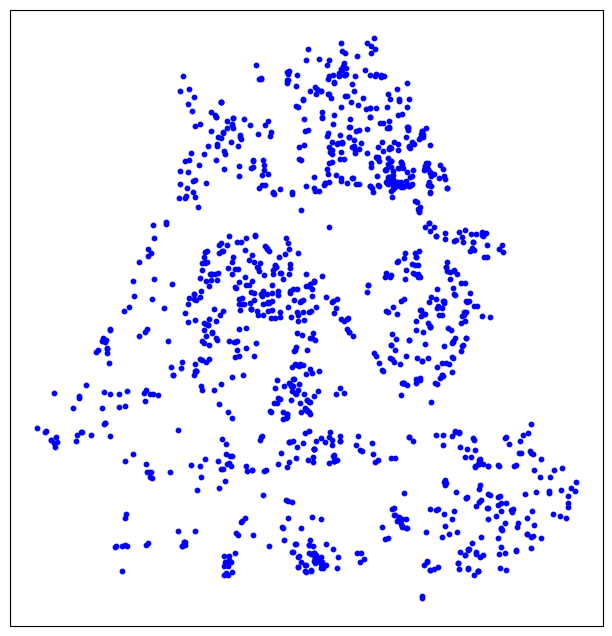

In [99]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)
plt.show()

In [100]:
#Se carga la cartografía de Floridablanca/Melbourne
url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.shp", "68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

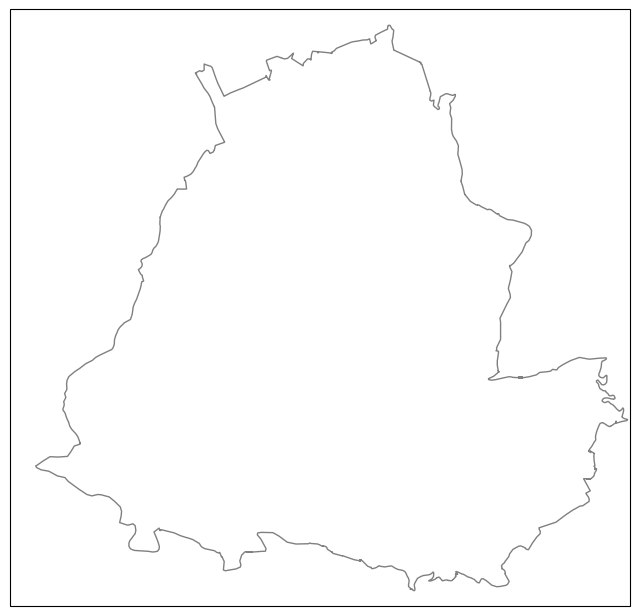

In [101]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

plt.show()

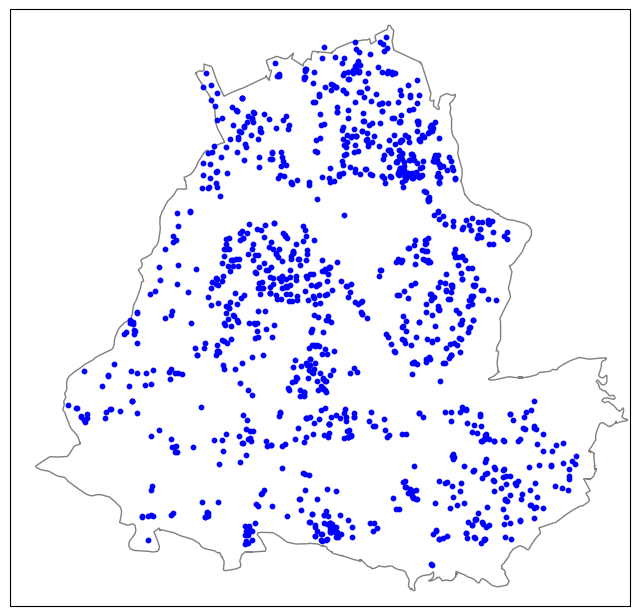

In [102]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

plt.show()

In [103]:


import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Carga el archivo shapefile en un GeoDataFrame
gdf = gpd.read_file('68276_urbano.shp')

# Define el cuadro delimitador
bbox = box(lower_lon, lower_lat, upper_lon, upper_lat)

# Intersecta el GeoDataFrame con el cuadro delimitador
intersected = gdf[gdf.intersects(bbox)]

# Re-proyecta las geometrías a una proyección UTM (por ejemplo, UTM Zone 18N para Colombia)
utm_zone = 18  # Puedes ajustar la zona UTM según tu ubicación
utm_crs = f"+proj=utm +zone={utm_zone} +datum=WGS84 +units=m +no_defs"
intersected = intersected.to_crs(utm_crs)

# Calcula el área total de las geometrías re-proyectadas
total_area = intersected.geometry.area.sum()


# Imprime el área total
print(f'Área total de la región de interés: {total_area} metros cuadrados')


Área total de la región de interés: 14180920.862356503 metros cuadrados


In [104]:
from shapely.geometry import box
from scipy.spatial import distance
import numpy as np


In [105]:
def dist_puntos(p1, p2):

    return ((p2[0]-p1[0])**2+(p2[1]-p1[1])**2)**0.5


point_coordinates = list(zip(df['x'], df['y']))

def ripley_k(point_coords, max_distance, area):
    num_points = len(point_coords)

    counter = 0
    for i in range(num_points):
      for j in range(i+1, num_points):
          distancia = dist_puntos(point_coords[i], point_coords[j])
          if distancia <= max_distance:
              counter = counter+1

    KR = area*counter/(num_points**2)
    return KR

max_distance = 20
ripley_values = ripley_k(point_coordinates, max_distance, total_area)
print(ripley_values)
for max_distance in range(20, 201, 20):
        ripley_value = ripley_k(point_coordinates, max_distance, total_area)

        print(f'Dataset real, Distancia Máxima {max_distance}m: {ripley_value}')

#print(point_coordinates)

3632.836787029275
Dataset real, Distancia Máxima 20m: 3632.836787029275
Dataset real, Distancia Máxima 40m: 8610.1793457287
Dataset real, Distancia Máxima 60m: 16160.781295240526
Dataset real, Distancia Máxima 80m: 25376.43343880744
Dataset real, Distancia Máxima 100m: 35420.158673535436
Dataset real, Distancia Máxima 120m: 47155.64613751726
Dataset real, Distancia Máxima 140m: 60956.86432353534
Dataset real, Distancia Máxima 160m: 76351.9006097452
Dataset real, Distancia Máxima 180m: 91809.26497808544
Dataset real, Distancia Máxima 200m: 109127.5677986049


In [106]:
pip install shapely


In [107]:
import random
from shapely.geometry import Point, Polygon


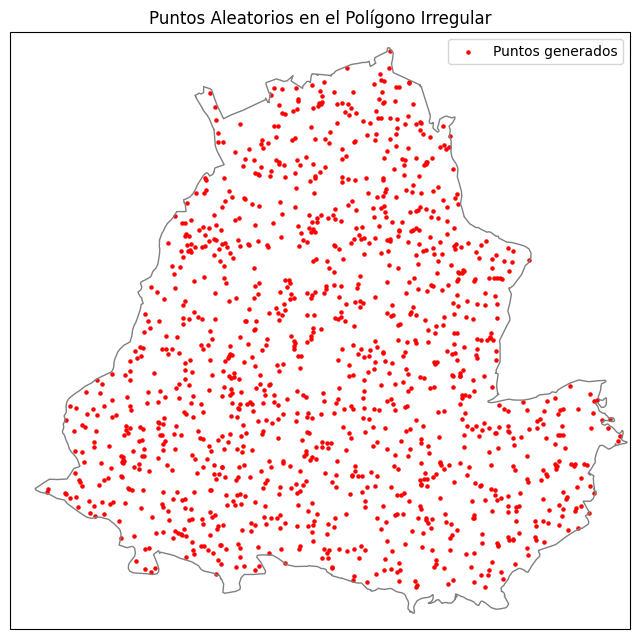

In [108]:
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)



# Establecer los límites de la gráfica
ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

gdf = gpd.read_file('68276_urbano.shp')
# Dibujar el polígono irregular
ax.add_geometries(gdf['geometry'], ccrs.PlateCarree(), facecolor='none', edgecolor='gray')

# Generar 1200 puntos aleatorios
puntos_generados = []
while len(puntos_generados) < len(point_coordinates):
    lon = random.uniform(lower_lon, upper_lon)
    lat = random.uniform(lower_lat, upper_lat)
    punto = Point(lon, lat)
    if punto.within(gdf['geometry'].iloc[0]):
        puntos_generados.append(punto)

coordenadas_x = [p.x for p in puntos_generados]
coordenadas_y = [p.y for p in puntos_generados]


plt.scatter(coordenadas_x, coordenadas_y, color='red', s=5, label='Puntos generados')
plt.legend()
plt.title('Puntos Aleatorios en el Polígono Irregular')
plt.show()

In [109]:
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

#función para generar puntos aleatorios dentro del polígono
def generar_puntos_aleatorios(num_puntos):
    puntos_generados = []
    while len(puntos_generados) < num_puntos:
        lon = random.uniform(lower_lon, upper_lon)
        lat = random.uniform(lower_lat, upper_lat)
        punto = Point(lon, lat)
        if punto.within(gdf['geometry'].iloc[0]):
            puntos_generados.append(punto)
    return puntos_generados

#función para calcular Ripley K
def calcular_ripley_k(point_coords, max_distance, area):
    num_points = len(point_coords)
    counter = 0
    for i in range(num_points):
        for j in range(i + 1, num_points):
            distancia = dist_puntos(point_coords[i], point_coords[j])
            if distancia <= max_distance:
                counter = counter + 1
    KR = area * counter / (num_points ** 2)
    return KR


ripley_values = []
def convertir_coordenadas(coordenadas):
    return [P(x, y) for x, y in coordenadas]

num_repeticiones = 10
#point_coordinates = list(zip(df['x'], df['y']))
for i in range(num_repeticiones):

    if i < 9:
        puntos_generados = generar_puntos_aleatorios(1200)
        puntos_generados_convertidos = convertir_coordenadas([(p.x, p.y) for p in puntos_generados])

    else:
        print("ENTRA ELSE")

        puntos_generados_convertidos = point_coordinates


    ripley_values_repeticion = []

    # Calcular Ripley K para distintas distancias máximas
    for max_distance in range(20, 201, 20):
        ripley_value = calcular_ripley_k(puntos_generados_convertidos, max_distance, total_area)
        ripley_values_repeticion.append(ripley_value)
        print(f'Repeticion {i+1}, Distancia Máxima {max_distance}m: {ripley_value}')


    ripley_values.append(ripley_values_repeticion)


ripley_values = np.array(ripley_values)

# Calcular los percentiles 2.5 y 97.5 para cada distancia en metros
for idx, max_distance in enumerate(range(20, 201, 20)):
    percentil_2_5 = np.percentile(ripley_values[:, idx], 2.5)
    percentil_97_5 = np.percentile(ripley_values[:, idx], 97.5)
    print(f'Distancia Máxima {max_distance}m - Percentil 2.5: {percentil_2_5}, Percentil 97.5: {percentil_97_5}')

Repeticion 1, Distancia Máxima 20m: 630.2631494380668
Repeticion 1, Distancia Máxima 40m: 2235.464608163143
Repeticion 1, Distancia Máxima 60m: 5229.21456799396
Repeticion 1, Distancia Máxima 80m: 9739.535231160125
Repeticion 1, Distancia Máxima 100m: 15234.64206532327
Repeticion 1, Distancia Máxima 120m: 21960.731613232638
Repeticion 1, Distancia Máxima 140m: 29760.238087528716
Repeticion 1, Distancia Máxima 160m: 38229.39915810274
Repeticion 1, Distancia Máxima 180m: 47998.47797439277
Repeticion 1, Distancia Máxima 200m: 59559.86762189731
Repeticion 2, Distancia Máxima 20m: 669.654596277946
Repeticion 2, Distancia Máxima 40m: 2393.0303955226595
Repeticion 2, Distancia Máxima 60m: 5554.194004422963
Repeticion 2, Distancia Máxima 80m: 9719.839507740186
Repeticion 2, Distancia Máxima 100m: 15490.686469782486
Repeticion 2, Distancia Máxima 120m: 22285.71104966164
Repeticion 2, Distancia Máxima 140m: 29474.650097939593
Repeticion 2, Distancia Máxima 160m: 38288.48632836255
Repeticion 2, D

In [110]:
#GRÁFICA VALOR K REAL

Distancia Máxima 20m - Percentil 2.5: 546.063931817825, Percentil 97.5: 2972.768100764457
Distancia Máxima 40m - Percentil 2.5: 2262.0538347800616, Percentil 97.5: 7299.951587322072
Distancia Máxima 60m - Percentil 2.5: 5137.629454091241, Percentil 97.5: 13854.066834657333
Distancia Máxima 80m - Percentil 2.5: 9368.763237779762, Percentil 97.5: 21917.957101974866
Distancia Máxima 100m - Percentil 2.5: 14950.531254990641, Percentil 97.5: 30986.990112040123
Distancia Máxima 120m - Percentil 2.5: 21152.714559929616, Percentil 97.5: 41626.38380929205
Distancia Máxima 140m - Percentil 2.5: 28568.89301716512, Percentil 97.5: 54092.72724236588
Distancia Máxima 160m - Percentil 2.5: 37483.42363357252, Percentil 97.5: 68051.30889371855
Distancia Máxima 180m - Percentil 2.5: 47186.52177640577, Percentil 97.5: 82308.57669269826
Distancia Máxima 200m - Percentil 2.5: 58371.96930313221, Percentil 97.5: 98105.56562304555


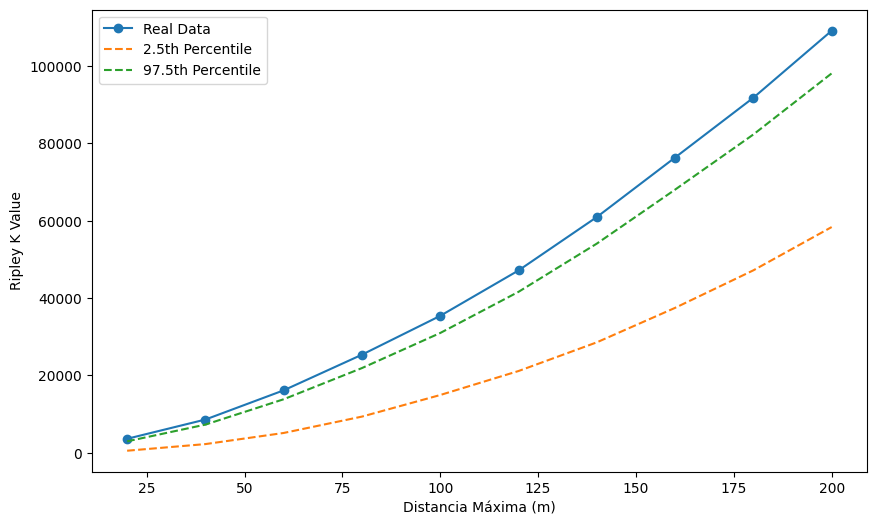

In [111]:
percentiles_2_5 = []
percentiles_97_5 = []

for idx, max_distance in enumerate(range(20, 201, 20)):
    percentil_2_5 = np.percentile(ripley_values[:, idx], 2.5)
    percentil_97_5 = np.percentile(ripley_values[:, idx], 97.5)
    print(f'Distancia Máxima {max_distance}m - Percentil 2.5: {percentil_2_5}, Percentil 97.5: {percentil_97_5}')
    percentiles_2_5.append(percentil_2_5)
    percentiles_97_5.append(percentil_97_5)


ripley_values_real = ripley_values[-1]


plt.figure(figsize=(10, 6))

plt.plot(range(20, 201, 20), ripley_values_real, label='Real Data', marker='o')
plt.plot(range(20, 201, 20), percentiles_2_5, label='2.5th Percentile', linestyle='--')
plt.plot(range(20, 201, 20), percentiles_97_5, label='97.5th Percentile', linestyle='--')


plt.xlabel('Distancia Máxima (m)')

plt.ylabel('Ripley K Value')
plt.legend()


plt.show()
